 # Part 3 : Are political parties essential for choosing the executive federal council?

In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.neighbors import kneighbors_graph

import networkx as nx

from scipy.sparse.linalg import eigs


> Here we reuse the missing value implementation from part 1 

## Getting the Data

In [2]:
votes = pd.read_csv("../generated/votes.csv.gz",index_col=0)
yesno = votes.iloc[:,1:].copy()
yesno[yesno>1] = np.NaN
yesno[yesno<0] = np.NaN
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
yesno_imp = imp.fit_transform(yesno.T).T

In [3]:
vote_data = pd.read_csv("../generated/vote_data.csv.gz")

In [4]:
members = pd.read_csv("../generated/members.csv")

## Getting the intution

> To get a sense of how politicians engaging in the federal concil are fitting in the polictical landscape, let's try to vizalize them on the clustering we produced 

In [5]:
# Finding the relevant politician 
per_politician = pd.DataFrame(votes.T)
per_politician["ix"] = range(len(per_politician))
federal_conselor_id = [str(i) for i in list(members[members["CouncilName"]=="Conseil fédéral"].index.values)]
federal_conselor_df = per_politician[per_politician.index.isin(federal_conselor_id)]
idx = list(federal_conselor_df["ix"].values)
print("From the database we have {} counselor that later became a federal counselor".format(len(idx)))

From the database we have 3 counselor that later became a federal counselor


In [6]:
federal_conselor_df

AffairShortId,1,2,20000421,20000431,20000436,20010056,20010080,20010083,20010461,20020308,...,20193413,20193417,20193418,20193420,20193531,20193541,20193667,20193955,20193956,ix
105,3,-1,0,2,0,1,-1,0,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,14
214,3,3,1,0,1,1,0,1,0,0,...,1,0,0,1,3,3,0,3,3,22
1157,-1,-1,1,1,-1,3,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,187


In [7]:
vote_data = pd.read_csv("../generated/vote_data.csv.gz")

In [8]:
vote_data

,AffairShortId,AffairTitle,VoteRegistrationNumber,VoteDate,VoteMeaningYes,VoteMeaningNo,DivisionText,VoteSubmissionText,VoteFilteredYes,VoteFilteredNo,...,VoteFilteredExcused,VoteFilteredPresident,CouncillorId,CouncillorName,CouncillorYes,CouncillorNo,CouncillorAbstain,CouncillorNotParticipated,CouncillorExcused,CouncillorPresident
0,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3923,Marra Ada,1,0,0,0,0,0
1,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3883,Glauser-Zufferey Alice,1,0,0,0,0,0
2,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3907,Thorens Goumaz Adèle,1,0,0,0,0,0
3,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3913,Wyss Brigit,1,0,0,0,0,0
4,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3878,Flückiger-Bäni Sylvia,1,0,0,0,0,0
5,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3877,Fiala Doris,1,0,0,0,0,0
6,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3876,Estermann Yvette,1,0,0,0,0,0
7,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3875,Eichenberger-Walther Corina,1,0,0,0,0,0
8,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3904,Schmid-Federer Barbara,1,0,0,0,0,0
9,20070464,Prorogation de la loi fédérale sur l'adaptatio...,248,2007-12-21 09:50:38+00:00,NaN,NaN,Ja,Vote final,196,1,...,0,1,3902,Rickli Natalie,1,0,0,0,0,0


In [9]:
members[members.index.isin(federal_conselor_id)]

,Active,FirstName,LastName,GenderAsString,CantonName,CantonAbbreviation,CouncilName,ParlGroupName,ParlGroupAbbreviation,PartyName,PartyAbbreviation,MaritalStatusText,BirthPlace_City,BirthPlace_Canton,Mandates,DateJoining,DateLeaving,Citizenship,DateOfBirth,DateOfDeath
37,True,Viola,Amherd,f,Valais,VS,Conseil fédéral,NaN,NaN,Parti démocrate-chrétien suisse,PDC,NaN,Brigue,Valais,Exekutive der Gemeinde (Stadträtin) Brig-Glis:...,2019-01-01,NaN,"Mund (VS),Brigue (VS),Zwischbergen (VS),Naters...",1962-06-07,NaN
102,True,Alain,Berset,m,Fribourg,FR,Conseil fédéral,NaN,NaN,Parti socialiste suisse,PSS,NaN,Fribourg,Fribourg,Législatif communal (conseil général) de Belfa...,2012-01-01,2016-12-31,Misery-Courtion (FR),1972-04-09,NaN
103,True,Alain,Berset,m,Fribourg,FR,Conseil fédéral,NaN,NaN,Parti socialiste suisse,PSS,NaN,Fribourg,Fribourg,Législatif communal (conseil général) de Belfa...,2017-01-01,2017-12-31,Misery-Courtion (FR),1972-04-09,NaN
104,True,Alain,Berset,m,Fribourg,FR,Conseil fédéral,NaN,NaN,Parti socialiste suisse,PSS,NaN,Fribourg,Fribourg,Législatif communal (conseil général) de Belfa...,2018-01-01,2018-12-31,Misery-Courtion (FR),1972-04-09,NaN
105,True,Alain,Berset,m,Fribourg,FR,Conseil fédéral,NaN,NaN,Parti socialiste suisse,PSS,NaN,Fribourg,Fribourg,Législatif communal (conseil général) de Belfa...,2019-01-01,NaN,Misery-Courtion (FR),1972-04-09,NaN
136,False,Christoph,Blocher,m,Zurich,ZH,Conseil fédéral,NaN,NaN,Union Démocratique du Centre,UDC,NaN,Laufen am Rheinfall,Zurich,Gemeinderat Meilen: von März 1974 bis März 197...,2004-01-01,2007-12-31,"Schattenhalb (BE),Zurich (ZH),Meilen (ZH),Lü (GR)",1940-10-11,NaN
203,False,Didier,Burkhalter,m,Neuchâtel,NE,Conseil fédéral,NaN,NaN,PLR.Les Libéraux-Radicaux,PLR,NaN,Neuchâtel,Neuchâtel,Législatif communal (Conseil général) de Haute...,2012-01-01,2012-12-31,"Neuchâtel (NE),Sumiswald (BE)",1960-04-17,NaN
205,False,Didier,Burkhalter,m,Neuchâtel,NE,Conseil fédéral,NaN,NaN,PLR.Les Libéraux-Radicaux,PLR,NaN,Neuchâtel,Neuchâtel,Législatif communal (Conseil général) de Haute...,2013-01-01,2013-12-31,"Neuchâtel (NE),Sumiswald (BE)",1960-04-17,NaN
206,False,Didier,Burkhalter,m,Neuchâtel,NE,Conseil fédéral,NaN,NaN,PLR.Les Libéraux-Radicaux,PLR,NaN,Neuchâtel,Neuchâtel,Législatif communal (Conseil général) de Haute...,2014-01-01,2014-12-31,"Neuchâtel (NE),Sumiswald (BE)",1960-04-17,NaN
207,False,Didier,Burkhalter,m,Neuchâtel,NE,Conseil fédéral,NaN,NaN,PLR.Les Libéraux-Radicaux,PLR,NaN,Neuchâtel,Neuchâtel,Législatif communal (Conseil général) de Haute...,2015-01-01,2017-10-31,"Neuchâtel (NE),Sumiswald (BE)",1960-04-17,NaN


> We see that our analysis will be limited by the fact that only three politician were voting during the gathering of the data at our disposal and went on to the federal consel. This is too few datapoint to derive some meaningfull conclusion but it is still interesent to observe what we can gather from it. Let's find out more about our three conselor

In [10]:
members[members.index.isin(list(federal_conselor_df.index.values))]

,Active,FirstName,LastName,GenderAsString,CantonName,CantonAbbreviation,CouncilName,ParlGroupName,ParlGroupAbbreviation,PartyName,PartyAbbreviation,MaritalStatusText,BirthPlace_City,BirthPlace_Canton,Mandates,DateJoining,DateLeaving,Citizenship,DateOfBirth,DateOfDeath
105,True,Alain,Berset,m,Fribourg,FR,Conseil fédéral,NaN,NaN,Parti socialiste suisse,PSS,NaN,Fribourg,Fribourg,Législatif communal (conseil général) de Belfa...,2019-01-01,NaN,Misery-Courtion (FR),1972-04-09,NaN
214,False,Micheline,Calmy-Rey,f,Genève,GE,Conseil fédéral,NaN,NaN,Parti socialiste suisse,PSS,NaN,NaN,NaN,NaN,2008-01-01,2010-10-31,Chermignon (VS),1945-07-08,NaN
1157,False,Samuel,Schmid,m,Berne,BE,Conseil fédéral,NaN,NaN,Union Démocratique du Centre,UDC,NaN,Rüti b. Büren,Berne,"Gemeinderat von 1971 bis 1982, Gemeindepräside...",2006-01-01,2008-12-31,Attiswil (BE),1947-01-08,NaN


In [11]:
# Get the pca 
def do_pca(data, explained_var=.75, return_fits=True):
    """
    Rescales variables to have mean zero, then performs PCA.
    
    Parameters
    ----------
    data:
        Data to transform. Rows are observations, columns are features
    explained_var:
        Retains enough principal components to explain "explained_var" percent
        of the total variance
    return_fits:
        If true, returns the rescale fit and the pca fit together with the principal components.
        Otherwise returns only principal components.
    """
    
    # Fit scaler and PCA
    scalefit = StandardScaler(with_std=False).fit(data)
    scaled = scalefit.transform(data)
    pcafit = PCA().fit(scaled)
    
    # Get nb pcs to retain
    expl_var = np.cumsum(pcafit.explained_variance_ratio_)
    nb_retain = np.where(expl_var>.75)[0][0]
    
    # Project onto PCs
    pc = pcafit.transform(scaled)[:,:nb_retain]
    
    if return_fits:
        return pc, scalefit, pcafit
    else:
        return pc

pc, scalefit, pcafit = do_pca(yesno_imp.T)

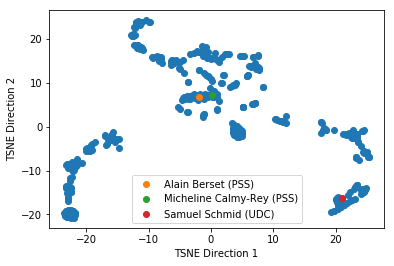

In [12]:
tsne = TSNE().fit_transform(pc)
def plot_tsne(tsne):
    plt.scatter(tsne[:,0], tsne[:,1])
    plt.xlabel("TSNE Direction 1")
    plt.ylabel("TSNE Direction 2")

plot_tsne(tsne)
labels = ['Alain Berset (PSS)', 'Micheline Calmy-Rey (PSS)', 'Samuel Schmid (UDC)']
for id,l in zip(idx,labels):
    plt.scatter(tsne[id,0], tsne[id,1],label=l)
plt.legend()
plt.show()

> Interestingly the 3 point seem to be quite far appart and member of quite different clusters. This is a bit surprising for Alain Berset and Micheline Calmy-Rey that belong to the same polictical party, but one should be careful when interpreting plot such as this one. We can now try and visualizing them on the graph representation.

In [13]:
def get_knn_graph(pc, k=10, sigma=1):
    """
    Obtains knn_graph, returns networkX weighted graph object, where the weights are the 
    graph distance.
    
    Parameters
    ----------
    pc:
        Principal components for graph imputation
    k:
        Number of nearest neighbors to consider
    sigma:
        The variance of the distance kernel
    """
    knn_graph = kneighbors_graph(pc, k, mode="distance")
    
    # Calculate kernel on non-zero elements of sparse matrix
    np.exp( -knn_graph.data / 2*sigma**2, out=knn_graph.data )

    # Create networkx object
    nx_graph = nx.from_scipy_sparse_matrix(knn_graph, edge_attribute='weight')
    if not nx.is_connected(nx_graph):
        warnings.warn("Resulting graph is not connected, spectral embedding may give unexpected results")
    return nx_graph

knn_graph = get_knn_graph(pc, k=10, sigma=.1)


/Users/oriane/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


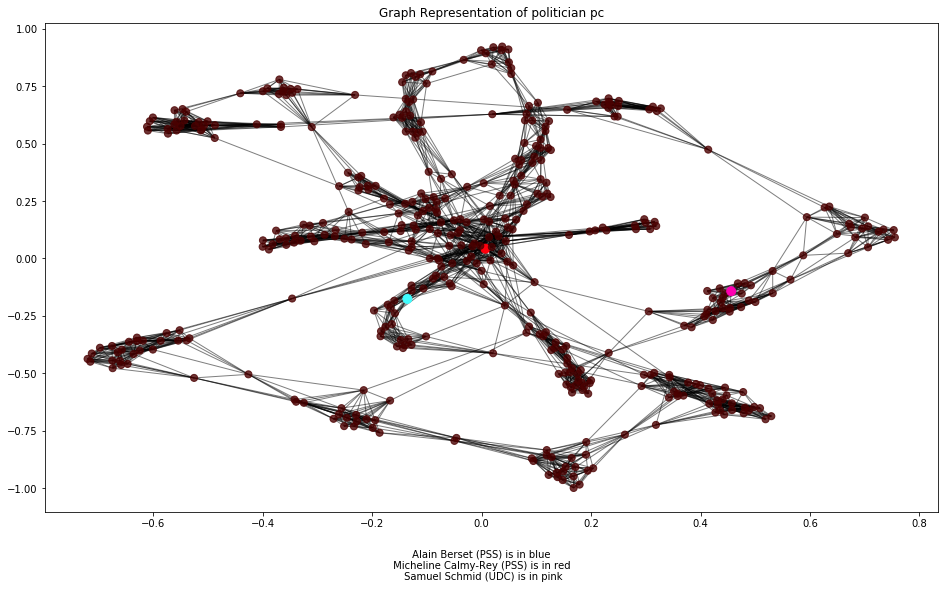

In [14]:
#Plotting the graph

plt.figure(figsize=(16,9))
G = knn_graph
labels = np.array(list(nx.get_edge_attributes(G,'weight').values()))

## assign a node attribute
my_category_dict = {14 : "Alain Berset (PSS)",22:"Micheline Calmy-Rey (PSS)",187:"Samuel Schmid (UDC)",0:"Some rando"}

for node in G.nodes():
    G.node[node]['category'] = my_category_dict.get(node, "Some rando")

 ## Create list of plotting attributes 
color_map = {'Alain Berset (PSS)':'xkcd:bright cyan', 'Micheline Calmy-Rey (PSS)':'xkcd:bright red', 'Samuel Schmid (UDC)':'xkcd:bright pink',"Some rando":"xkcd:dried blood"} 
alpha_map = {'Alain Berset (PSS)':1, 'Micheline Calmy-Rey (PSS)':1, 'Samuel Schmid (UDC)':1,"Some rando":.8} 
size_map = {'Alain Berset (PSS)':80, 'Micheline Calmy-Rey (PSS)':80, 'Samuel Schmid (UDC)':80,"Some rando":50} 

nodes_colors = [color_map[G.node[node]['category']] for node in G]
nodes_sizes = [size_map[G.node[node]['category']] for node in G]
nodes_alphas = [alpha_map[G.node[node]['category']] for node in G]

## plotting the graph with given atttributes
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, node_color=nodes_colors,node_size=nodes_sizes,alpha=nodes_alphas)
nx.draw_networkx_edges(G, pos, alpha=.5)
plt.title("Graph Representation of politician pc")
plt.text(np.asarray(list(pos.values()))[:,0].mean(), np.asarray(list(pos.values()))[:,1].min() - 0.4, " Alain Berset (PSS) is in blue \n Micheline Calmy-Rey (PSS) is in red \n Samuel Schmid (UDC) is in pink", ha='center')
plt.show()

> Again the three seem quite far appart, and Micheline Calmy-Rey seems more closely connected to Samuel Schmid who is almost at the opposit of teh political spectrum than to Alain Berset that is in the same party as her. It also interesting to note that all three point seems somehow well connected. It would seems like a good criteria for a exectutive represent to be a "hub" of the graph as it would mean they are ?? with more people. Let's take a closer look at the "hub" propriety of our three conselor.

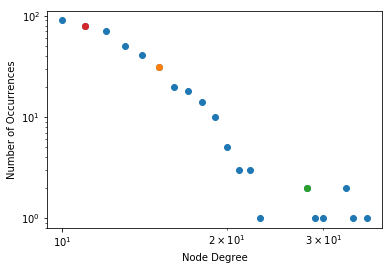

In [15]:
def plot_degree_distribution(graph):
    deg = np.array(graph.degree())[:,1]
    val, count = np.unique(deg, return_counts=True)
    dict_hist = dict(zip(val, count))
    plt.loglog(val, count, 'o')
    plt.xlabel("Node Degree")
    plt.ylabel("Number of Occurrences")
    for id in idx :
        val = graph.degree(id)
        plt.loglog(val,dict_hist[val], 'o')
plot_degree_distribution(knn_graph)    

> So it doesn't seem that they are that well connected. It would be interesting to select the most well connected 7 individual and see if they could be a good fit for the executuve representent

Questions :
    - does it make sense
    - Why not trying to compare this to actual belonging of party 

In [16]:
# Find the 7 most connected node
degrees = {G.degree(n) : n for n in G.nodes()}
def Nmaxelements(list1, N): 
    final_list = [] 
  
    for i in range(0, N):  
        max1 = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]; 
                  
        list1.remove(max1); 
        final_list.append(max1) 
          
    return final_list
better_conselor_idxs = np.asarray([[degrees[i],i] for i in Nmaxelements(list(degrees.keys()), 7)])

# Figuring out who does node represent 
better_conselor_df = members[members.index.isin(better_conselor_idxs[:,0])].fillna("undefined")
better_conselor_df

,Active,FirstName,LastName,GenderAsString,CantonName,CantonAbbreviation,CouncilName,ParlGroupName,ParlGroupAbbreviation,PartyName,PartyAbbreviation,MaritalStatusText,BirthPlace_City,BirthPlace_Canton,Mandates,DateJoining,DateLeaving,Citizenship,DateOfBirth,DateOfDeath
4,True,Jean-Luc,Addor,m,Valais,VS,Conseil national,Groupe de l'Union démocratique du Centre,V,Union Démocratique du Centre,UDC,undefined,Lausanne,Vaud,Député au Grand Conseil: 2005-2015; Conseiller...,2015-11-30,2019-12-01,"Ste-Croix (VD),Savièse (VS)",1964-04-22,undefined
35,False,Viola,Amherd,f,Valais,VS,Conseil national,Groupe PDC-PEV,CE,Parti démocrate-chrétien suisse,PDC,undefined,Brigue,Valais,Exekutive der Gemeinde (Stadträtin) Brig-Glis:...,2011-12-05,2015-11-29,"Mund (VS),Brigue (VS),Zwischbergen (VS),Naters...",1962-06-07,undefined
109,False,Kathrin,Bertschy,f,Berne,BE,Conseil national,undefined,undefined,Parti vert'libéral,pvl,undefined,Thoune,Berne,Legislative der Stadt Bern: von Januar 2009 bi...,2019-12-02,undefined,"Guin (FR),Berne (BE)",1979-07-02,undefined
115,False,Attilio,Bignasca,m,Tessin,TI,Conseil national,Groupe de l'Union démocratique du Centre,V,Lega dei Ticinesi,Lega,undefined,Viganello,Tessin,Legislativo comunale: da aprile 1992; legislat...,2007-12-03,2009-12-31,Sonvico (TI),1943-11-01,undefined
170,False,Toni,Brunner,m,St-Gall,SG,Conseil national,Groupe de l'Union démocratique du Centre,V,Union Démocratique du Centre,UDC,célibataire,Wattwil,St-Gall,undefined,2007-12-03,2011-12-04,"Hemberg (SG),Ebnat-Kappel (SG)",1974-08-23,undefined
180,False,Roland Rino,Büchel,m,St-Gall,SG,Conseil national,undefined,undefined,Union Démocratique du Centre,UDC,undefined,Altstätten,St-Gall,Legislative des Kantons: von Juni 2004 bis Mai...,2019-12-02,undefined,Rüthi (Rheintal) (SG),1965-10-08,undefined
284,False,Simone,de Montmollin,f,Genève,GE,Conseil national,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,2019-12-02,undefined,undefined,1968-07-20,undefined


> Let's see on the graph where they would be 

/Users/oriane/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


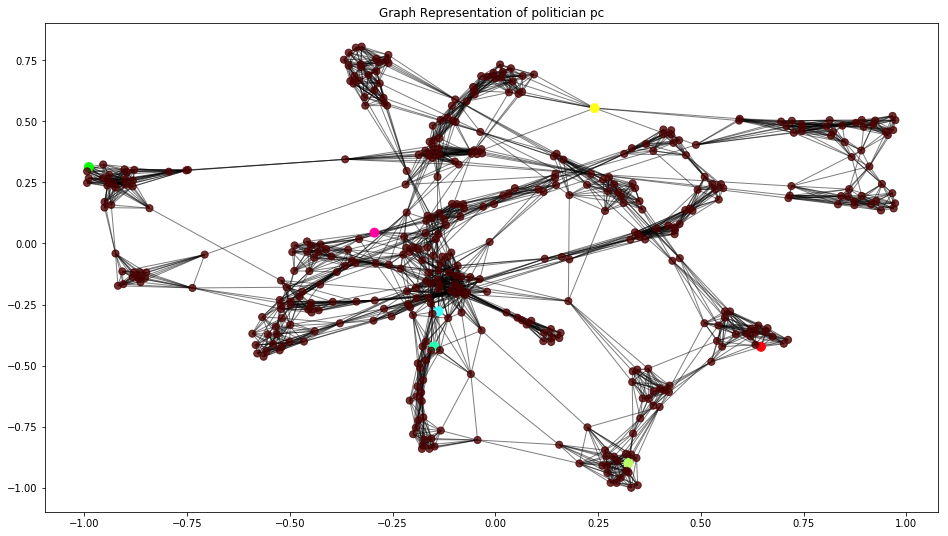

In [17]:
#Plotting the graph

plt.figure(figsize=(16,9))
G = knn_graph
labels = np.array(list(nx.get_edge_attributes(G,'weight').values()))

def get_name(idx):
    row = better_conselor_df.loc[better_conselor_df.index == idx]
    return str(row["FirstName"].values[0] +" "+row["LastName"].values[0]+" ("+ row["PartyAbbreviation"].values[0]+ ")")
## assign a node attribute
my_category_dict = {0:"Some rando"}
for idx,node in better_conselor_idxs:
    my_category_dict[node] = get_name(idx)

for node in G.nodes():
    G.node[node]['category'] = my_category_dict.get(node, "Some rando")

 ## Create list of plotting attributes 
colors = ["xkcd:dried blood",'xkcd:bright cyan','xkcd:bright red','xkcd:yellow','xkcd:greenish cyan','xkcd:shocking pink','xkcd:light lime green','xkcd:fluorescent green']
color_map = {x:c for x,c in zip(my_category_dict.values(),colors)}

alphas = [0.8]+[1]*7
alpha_map = {x:c for x,c in zip(my_category_dict.values(),alphas)} 

sizes = [50]+[80]*7
size_map = {x:c for x,c in zip(my_category_dict.values(),sizes)} 

nodes_colors = [color_map[G.node[node]['category']] for node in G]
nodes_sizes = [size_map[G.node[node]['category']] for node in G]
nodes_alphas = [alpha_map[G.node[node]['category']] for node in G]

## plotting the graph with given atttributes
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, node_color=nodes_colors,node_size=nodes_sizes,alpha=nodes_alphas)
nx.draw_networkx_edges(G, pos, alpha=.5)
plt.title("Graph Representation of politician pc")
plt.show()

> Let's vizualise them on the tsne

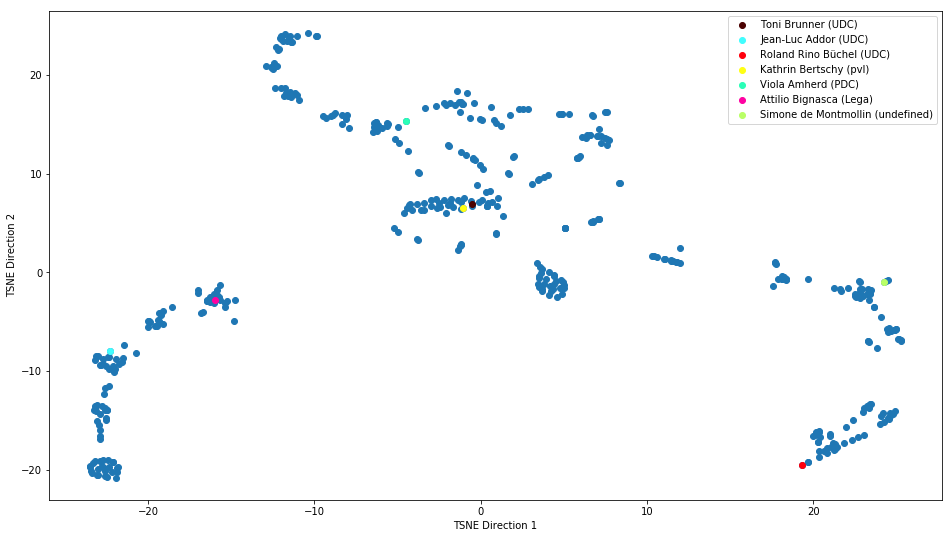

In [18]:
plt.figure(figsize=(16,9))
plot_tsne(tsne)
for (idx,node),c in zip(better_conselor_idxs,colors):
    plt.scatter(tsne[node,0], tsne[node,1],label=get_name(idx),c=c)
plt.legend()
plt.show()

TODO : 
    - See who this people are
    - See them on the graph
    - see them on the TSNE
    - try doing k-means with them as seeds
    

In [19]:
def visualize_clusterings(coordinates, clusters):
    plt.scatter(coordinates[:,0], coordinates[:,1], c=clusters, cmap="gnuplot")

/Users/oriane/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


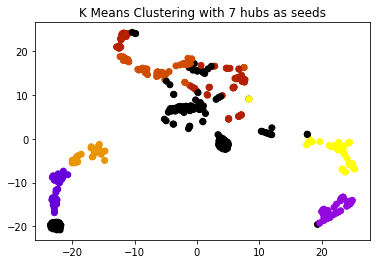

In [20]:
seeds = np.asarray([pc[node,:] for idx,node in better_conselor_idxs ])
cl = KMeans(n_clusters=7,init=seeds).fit(pc)
plt.title("K Means Clustering with 7 hubs as seeds")
visualize_clusterings(tsne, cl.labels_)

In [21]:
def spectral_embedding(nx_graph, n=15):
    """
    Calculates spectral embedding based on normalized Laplacian matrix.
    
    Parameters
    ----------
    nx_graph:
        NetworkX graph to analyze
    n_evals:
        Number of smallest eigenvalues and corresponding eigenvectors to be computed
        
    Returns
    -------
    evals:
        Eigenvalues of spectral embedding
    evecs:
        Eigenvectors of spectral embedding
    """
    norm_L = nx.normalized_laplacian_matrix(nx_graph)
    evals, evecs = eigs(norm_L, k=n, which="SM")
    evals = np.real(evals)
    evecs = np.real(evecs)
    return evals, evecs

sp_evals, sp_evecs = spectral_embedding(knn_graph)